# Imports and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import os

SEED = 321
np.random.seed(SEED)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
sns.set_context('talk', font_scale=0.9)

In [2]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [3]:
df = pd.read_csv("covid_us_county.csv")
display(df.head())
df.info()

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017826 entries, 0 to 3017825
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   fips        float64
 1   county      object 
 2   state       object 
 3   lat         float64
 4   long        float64
 5   date        object 
 6   cases       int64  
 7   state_code  object 
 8   deaths      int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 207.2+ MB


## Fixing Dataframe to Workable State

In [4]:
df.loc[df['state'] == 'American Samoa', 'state_code'] = 'AS'
df.loc[df['state'] == 'District of Columbia', 'state_code'] = 'DC'
df.loc[df['state'] == 'Guam', 'state_code'] = 'GU'
df.loc[df['state'] == 'Northen Mariana Islands', 'state_code'] = 'MP'
df.loc[df['state'] == 'Puerto Rico', 'state_code'] = 'PR'
df.loc[df['state'] == 'Virgin Islands', 'state_code'] = 'VI'
df.loc[(df['state'] == 'Diamond Princess') | (df['state'] == 'Grand Princess'), 'state_code'] = 'CR'

df['state_code'].unique()

array(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'CR', 'DC',
       'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
       'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'NC', 'ND', nan, 'OH', 'OK', 'OR', 'PA', 'PR',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV',
       'WI', 'WY'], dtype=object)

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,fips,county,state,lat,long,cases,state_code,deaths
date,,,,,,,,
2020-01-22,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-23,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-24,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-25,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-26,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
...,...,...,...,...,...,...,...,...
2022-07-08,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19
2022-07-09,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19
2022-07-10,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19


In [6]:
df.drop(columns=['fips','lat','long'], inplace=True)
df.head()

,county,state,cases,state_code,deaths
date,,,,,
2020-01-22,Autauga,Alabama,0,AL,0
2020-01-23,Autauga,Alabama,0,AL,0
2020-01-24,Autauga,Alabama,0,AL,0
2020-01-25,Autauga,Alabama,0,AL,0
2020-01-26,Autauga,Alabama,0,AL,0


In [7]:
state = df.groupby('state_code').resample('D').sum()
state

C:\Users\austi\AppData\Local\Temp\ipykernel_12312\107455030.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state = df.groupby('state_code').resample('D').sum()


cases  deaths
state_code date                      
AK         2020-01-22       0       0
           2020-01-23       0       0
           2020-01-24       0       0
           2020-01-25       0       0
           2020-01-26       0       0
...                       ...     ...
WY         2022-07-08  165619    1834
           2022-07-09  165619    1834
           2022-07-10  165619    1834
           2022-07-11  165619    1834
           2022-07-12  167386    1845

[50568 rows x 2 columns]

# Setting Up Comparison

In [10]:
ny = state.loc['NY','cases']
ky = state.loc['KY', 'cases']

compare = pd.DataFrame({'KY':ky,
                        'NY':ny})
compare

,KY,NY
date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2022-07-08,1414766,5661360
2022-07-09,1414766,5665385
2022-07-10,1414766,5668645


## Plot Compare Data

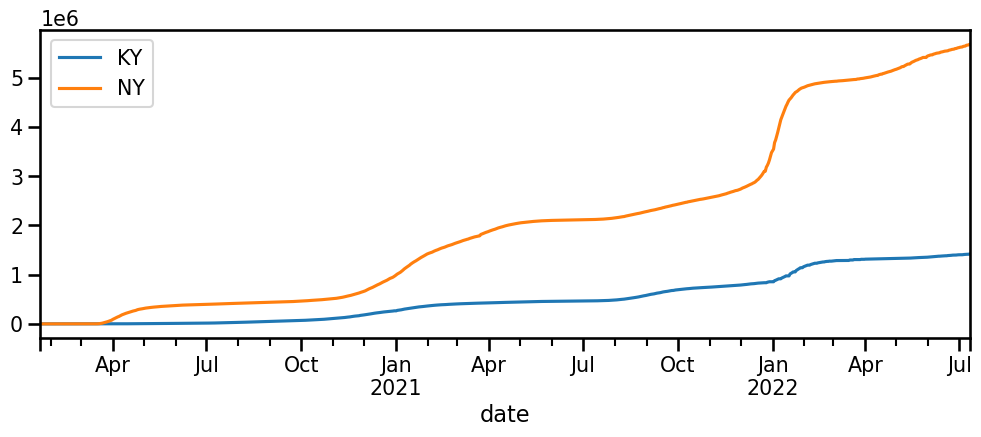

In [11]:
compare.plot();

## Examine the Difference

In [12]:
compareDiff = compare.diff().dropna()
compareDiff

,KY,NY
date,,
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
...,...,...
2022-07-08,2143.0,15343.0
2022-07-09,0.0,4025.0
2022-07-10,0.0,3260.0


## Plot the Diff

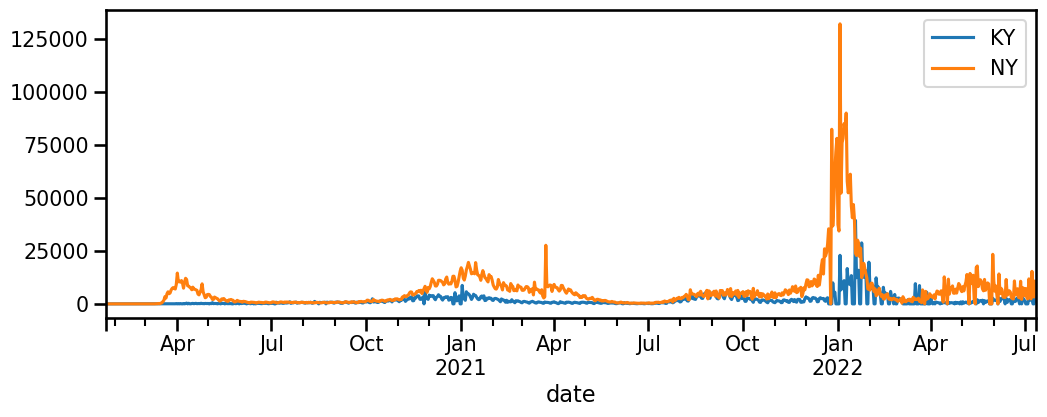

In [14]:
compareDiff.plot();

## Looking at the Daily Percent Change

In [16]:
comparePct = compare.pct_change(freq='D')*100
comparePct

,KY,NY
date,,
2020-01-22,NaN,NaN
2020-01-23,NaN,NaN
2020-01-24,NaN,NaN
2020-01-25,NaN,NaN
2020-01-26,NaN,NaN
...,...,...
2022-07-08,0.151704,0.271749
2022-07-09,0.000000,0.071096
2022-07-10,0.000000,0.057542


## Drop early data since high spikes are ecpected

In [17]:
covid = comparePct.loc['07/2021':]
covid

,KY,NY
date,,
2021-07-01,0.035041,0.018487
2021-07-02,0.034384,0.023778
2021-07-03,0.039958,0.013517
2021-07-04,0.016320,0.016539
2021-07-05,0.015888,0.017576
...,...,...
2022-07-08,0.151704,0.271749
2022-07-09,0.000000,0.071096
2022-07-10,0.000000,0.057542


## Plotting the Percent Change

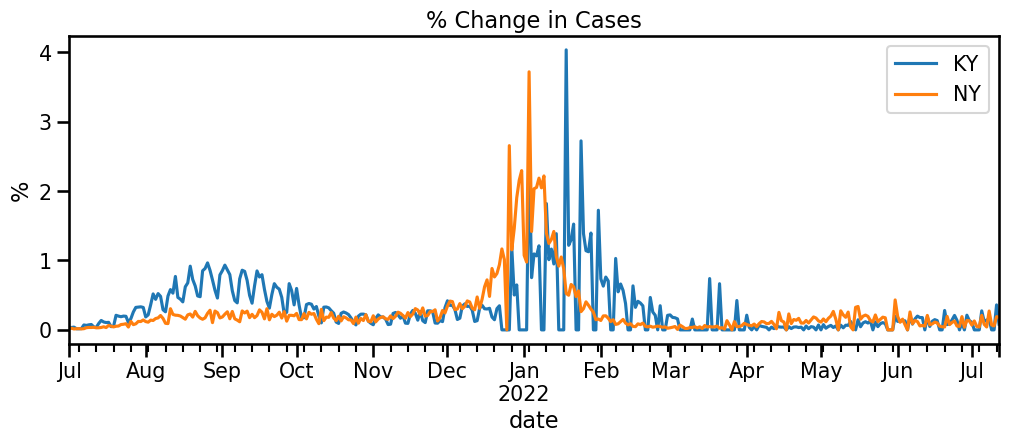

In [18]:
ax = covid.plot(title='% Change in Cases', ylabel='%')

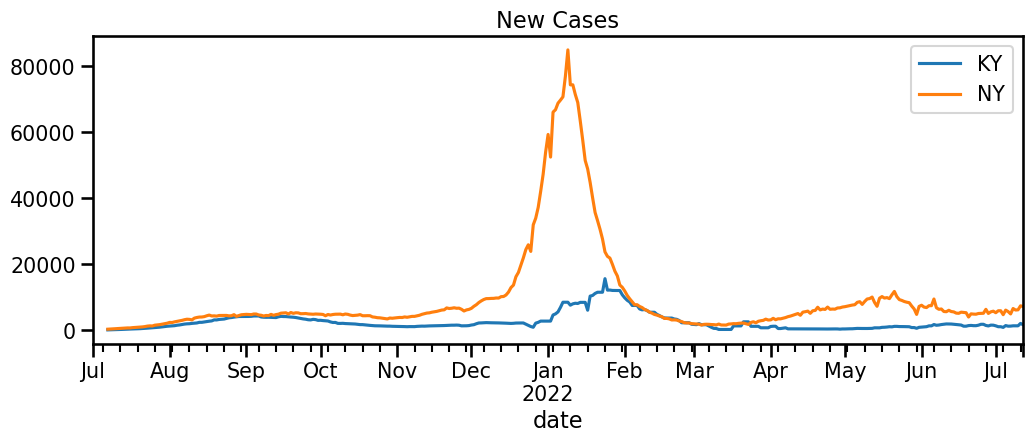

In [19]:
compareDiff.loc['07/2021':].rolling(7).mean().plot(title='New Cases');

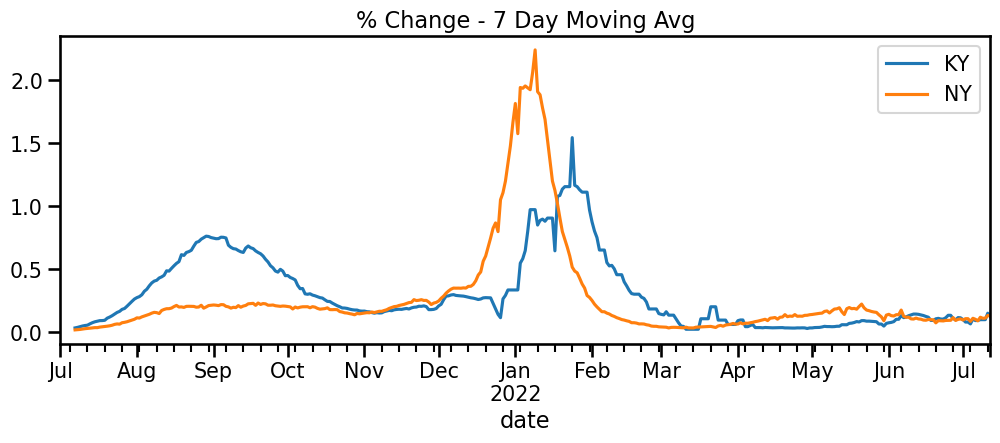

In [21]:
window = 7
pctPlot = comparePct.loc['07/2021':].rolling(window).mean()
pctPlot.plot(title=f'% Change - {window} Day Moving Avg');

The moving average percent change gives us a better representation of the spread of COVID throughout the states when comparing them. This shows us that there were times when KY was worse off than NY and vice versa. Though it appears NY took a harder hit, they also maintain a larger population. 

# Normalize by Population

Utilizing population data from the Kaggle 2019 US Census dataset: 
https://www.kaggle.com/datasets/peretzcohen/2019-census-us-population-data-by-state?resource=download

In [22]:
pop = pd.read_csv('2019_Census_US_Population_Data_By_State_Lat_Long.csv')
pop.head()

,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629


## Using original df to create a state:state_code list

In [28]:
stateLookup = df[['state','state_code']]
stateLookup = stateLookup.drop_duplicates(subset=['state']).reset_index(drop=True)
stateLookup.head()

,state,state_code
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


### Merging the data

In [32]:
popDF = pd.merge(pop[['STATE','POPESTIMATE2019']], stateLookup,
                 left_on='STATE', right_on='state')
statePop = popDF.set_index('state_code')['POPESTIMATE2019']
statePop.head()

state_code
AL     4903185
AK      731545
AZ     7278717
AR     3017804
CA    39512223
Name: POPESTIMATE2019, dtype: int64

In [36]:
comparePop = compare.copy()

for col in compare.columns:
    comparePop[col] = (comparePop[col] / statePop[col]*100_000)

comparePop

,KY,NY
date,,
2020-01-22,0.000000,0.000000
2020-01-23,0.000000,0.000000
2020-01-24,0.000000,0.000000
2020-01-25,0.000000,0.000000
2020-01-26,0.000000,0.000000
...,...,...
2022-07-08,31666.731204,29101.921237
2022-07-09,31666.731204,29122.611536
2022-07-10,31666.731204,29139.369394


## Plotting the Cases w/ Population Adj

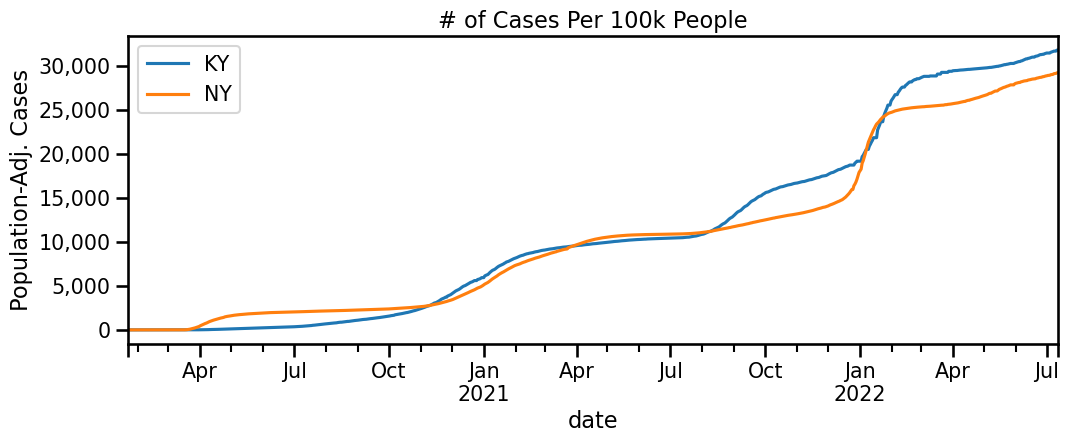

In [44]:
strFmt = mticks.StrMethodFormatter('{x:,.0f}')

ax = comparePop.plot(ylabel='Population-Adj. Cases', title='# of Cases Per 100k People');
ax.yaxis.set_major_formatter(strFmt)

This gives us the best story when we normalize this data based on the population as it gives a true comparison of the impact COVID had.